In [4]:
from sklearn.datasets import load_digits
digit=load_digits()
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


In [2]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [1,10,20]
}, cv=5, return_train_score=False)
clf.fit(digit.data, digit.target)
clf.cv_results_

{'mean_fit_time': array([0.00492492, 0.00952625, 0.00080123]),
 'std_fit_time': array([0.00572479, 0.00778283, 0.00160246]),
 'mean_score_time': array([1.04611616, 0.61528091, 0.53204184]),
 'std_score_time': array([1.06419996, 0.16016305, 0.10117406]),
 'param_n_neighbors': masked_array(data=[1, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1}, {'n_neighbors': 10}, {'n_neighbors': 20}],
 'split0_test_score': array([0.96111111, 0.93055556, 0.925     ]),
 'split1_test_score': array([0.95277778, 0.94722222, 0.95277778]),
 'split2_test_score': array([0.96657382, 0.96935933, 0.96657382]),
 'split3_test_score': array([0.98607242, 0.97771588, 0.9637883 ]),
 'split4_test_score': array([0.95543175, 0.94986072, 0.94428969]),
 'mean_test_score': array([0.96439338, 0.95494274, 0.95048592]),
 'std_test_score': array([0.01183842, 0.01677273, 0.01502632]),
 'rank_test_score': array([1, 2, 3])}

In [5]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004925,0.005725,1.046116,1.064200,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,1
1,0.009526,0.007783,0.615281,0.160163,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,2
2,0.000801,0.001602,0.532042,0.101174,20,{'n_neighbors': 20},0.925000,0.952778,0.966574,0.963788,0.944290,0.950486,0.015026,3


In [6]:
clf.best_params_

{'n_neighbors': 1}

In [7]:
clf.best_score_

0.9643933766635715

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.3)

In [12]:
model=KNeighborsClassifier(n_neighbors=1)

In [13]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 64,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 46]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

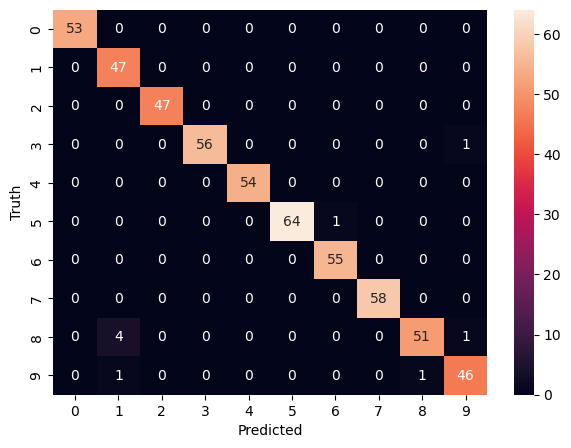

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.90      1.00      0.95        47
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        57
           4       1.00      1.00      1.00        54
           5       1.00      0.98      0.99        65
           6       0.98      1.00      0.99        55
           7       1.00      1.00      1.00        58
           8       0.98      0.91      0.94        56
           9       0.96      0.96      0.96        48

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

